In [1]:
#import pandas as pd, numpy as np, matplotlib.pyplot as plt
from notebooks_tools import * 
%matplotlib inline

/usr/local/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


Welcome to ROOTaaS 6.06/02

RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



In [2]:
data = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/AnaFiles/BNB_ANA/Features_larlite_BNB5e19_mu-p_maxp_pscore0.9_Dec2016.csv')
mixed = pd.read_csv('/Users/erezcohen/Desktop/uBoone/analysis/AnaFiles/BNB_ANA/Features_larlite_BNB5e19_mu-p_maxp_pscore0.9_Dec2016_mixed.csv')

# MC - BNB
MCBNB_gen = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/g4_features_MC_BNB_AnalysisTrees.csv')
MCBNB_gen_protons = MCBNB_gen[(MCBNB_gen.pdg==2212) & (MCBNB_gen.primary==1)]
MCBNB_rec = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MC_BNB_AnalysisTrees.csv')
MCBNB_rec_protons = MCBNB_rec[(MCBNB_rec.MCpdgCode==2212)  & (MCBNB_rec.process_primary==1)]

MCBNB_gen_CCQE_protons = MCBNB_gen_protons[MCBNB_gen_protons.truth_ccnc==1]
print 'MCBNB CCQE generated protons: ',len(MCBNB_gen_CCQE_protons)
print 'MCBNB generated protons: ',len(MCBNB_gen_protons)

MCBNB_rec_CCQE_protons = MCBNB_rec_protons[(MCBNB_rec_protons.truth_ccnc==1) & (MCBNB_rec_CCQE_protons.length>1.5)]
print 'MCBNB CCQE rec. protons: ',len(MCBNB_rec_CCQE_protons)
print 'MCBNB rec. protons: ',len(MCBNB_rec_protons)

In [3]:
MCBNB_rec = pd.read_csv('/Users/erezcohen/Desktop/uBoone/AnalysisTreesAna/FeaturesFiles/full_features_MC_BNB_AnalysisTrees.csv')
MCBNB_rec_protons = MCBNB_rec[(MCBNB_rec.MCpdgCode==2212)  & (MCBNB_rec.process_primary==1)]

MCBNB_rec_CCQE_protons = MCBNB_rec_protons[(MCBNB_rec_protons.truth_ccnc==1) & (MCBNB_rec_protons.length>1.5)]
print 'MCBNB CCQE rec. protons: ',len(MCBNB_rec_CCQE_protons)
print 'MCBNB rec. protons: ',len(MCBNB_rec_protons)

MCBNB CCQE rec. protons:  20685
MCBNB rec. protons:  134019


(0, 1600)

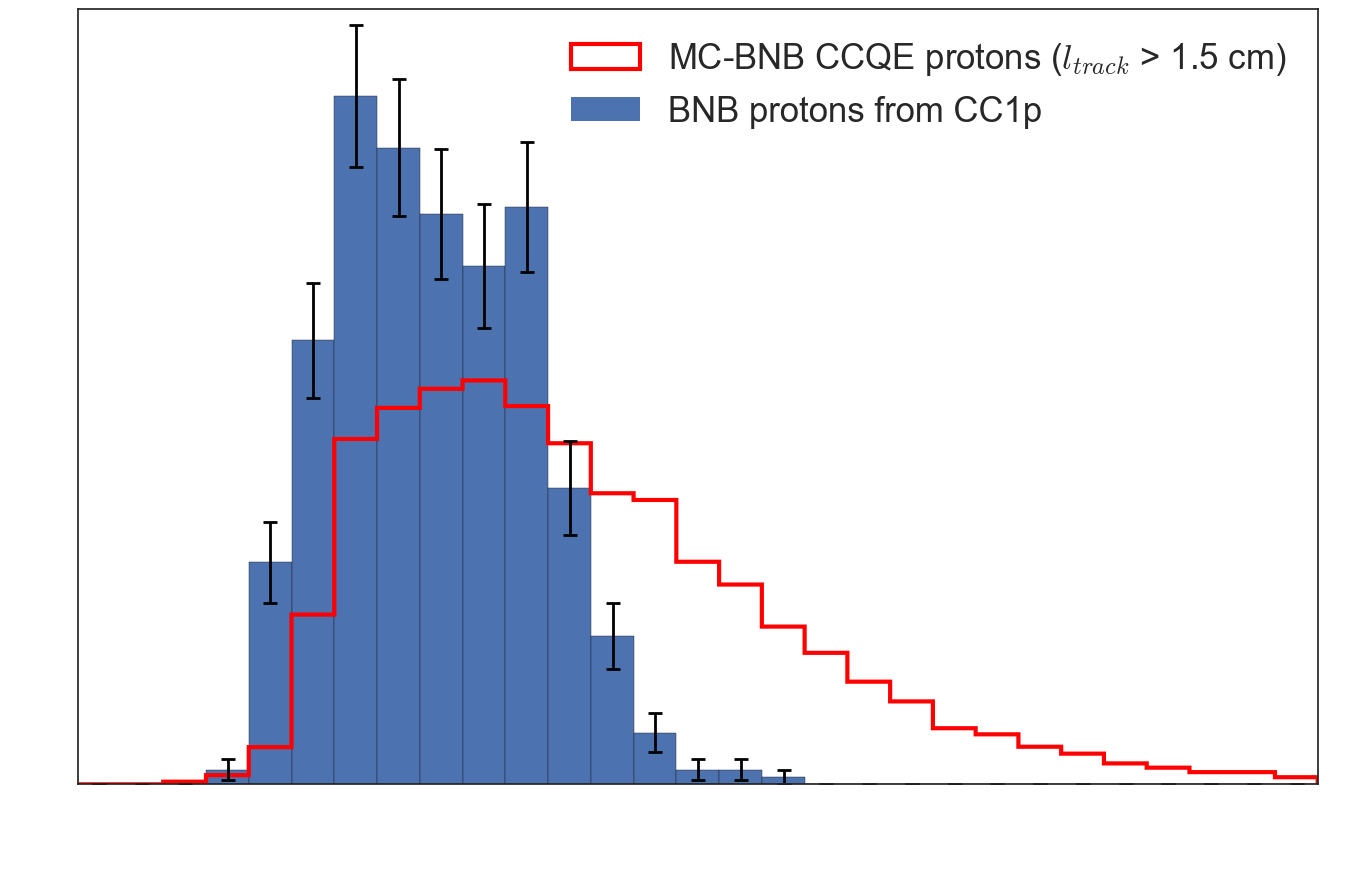




tab completion not implemented for this context


In [7]:
bins=np.linspace(0,1600,30)
ax , h , bins , mid = hist_with_errors( data.p_P , bins=bins ,
                                       xlabel='proton momentum [Mev/c]' , figsize=(16,10), label='BNB protons from CC1p')
weights = (float(len(data))/len(MCBNB_rec_CCQE_protons))*(MCBNB_rec_CCQE_protons.truth_P/MCBNB_rec_CCQE_protons.truth_P)
plt.hist(1000*MCBNB_rec_CCQE_protons.truth_P,bins=bins,weights=weights
         ,label='MC-BNB CCQE protons ($l_{track}$ > 1.5 cm)',histtype='step',linewidth=3,color='red')
plt.legend(loc='best',fontsize=25)
# ax.set_ylim(0,1.02*np.max(h+np.sqrt(h)))
set_axes(ax=ax, x_label='proton momentum [Mev/c]',y_label='', ticks_color='white')
ax.set_xlim(0,1600)

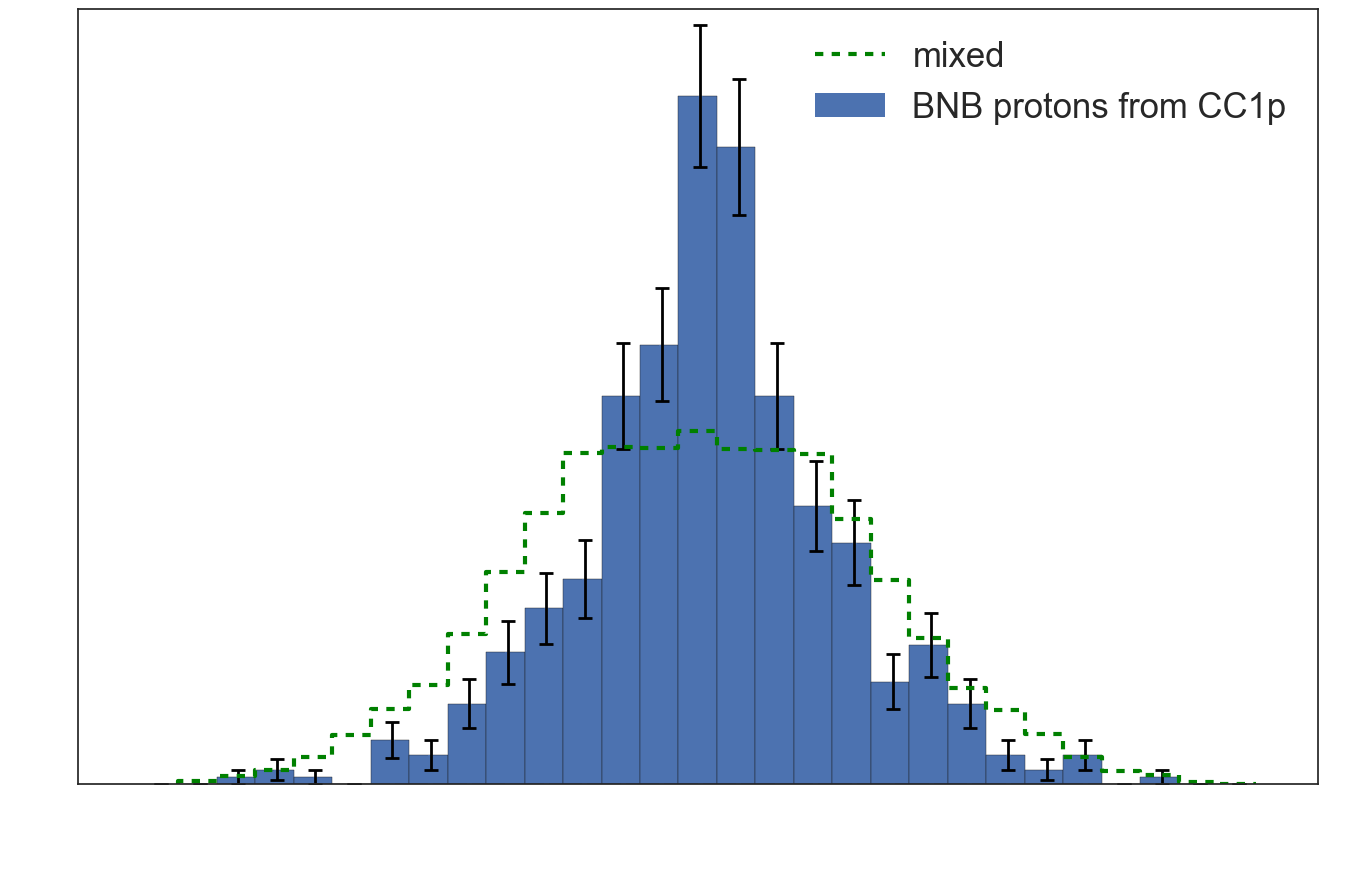

In [6]:
do_add_mixed = True
bins=np.linspace(-90,90,30)

ax , h , bins , mid = hist_with_errors( data.angle_z_mup_plane , bins=bins ,
                                       xlabel='Shapiro Angle [deg.]' , figsize=(16,10), label='BNB protons from CC1p',ticks_color='white')
weights = (float(len(data))/len(mixed))*(mixed.p_P/mixed.p_P)
if do_add_mixed:
    h,bins,patches = plt.hist(mixed.angle_z_mup_plane,bins=bins,weights=weights,histtype='step',linewidth=0,color='green')
    mid = 0.5*(bins[1:] + bins[:-1]) + 0.5*(bins[1]-bins[0])
    plt.plot( mid , h , linestyle='--', drawstyle='steps' , linewidth=3 , color='green',label='mixed')
    plt.legend(loc='best',fontsize=25)

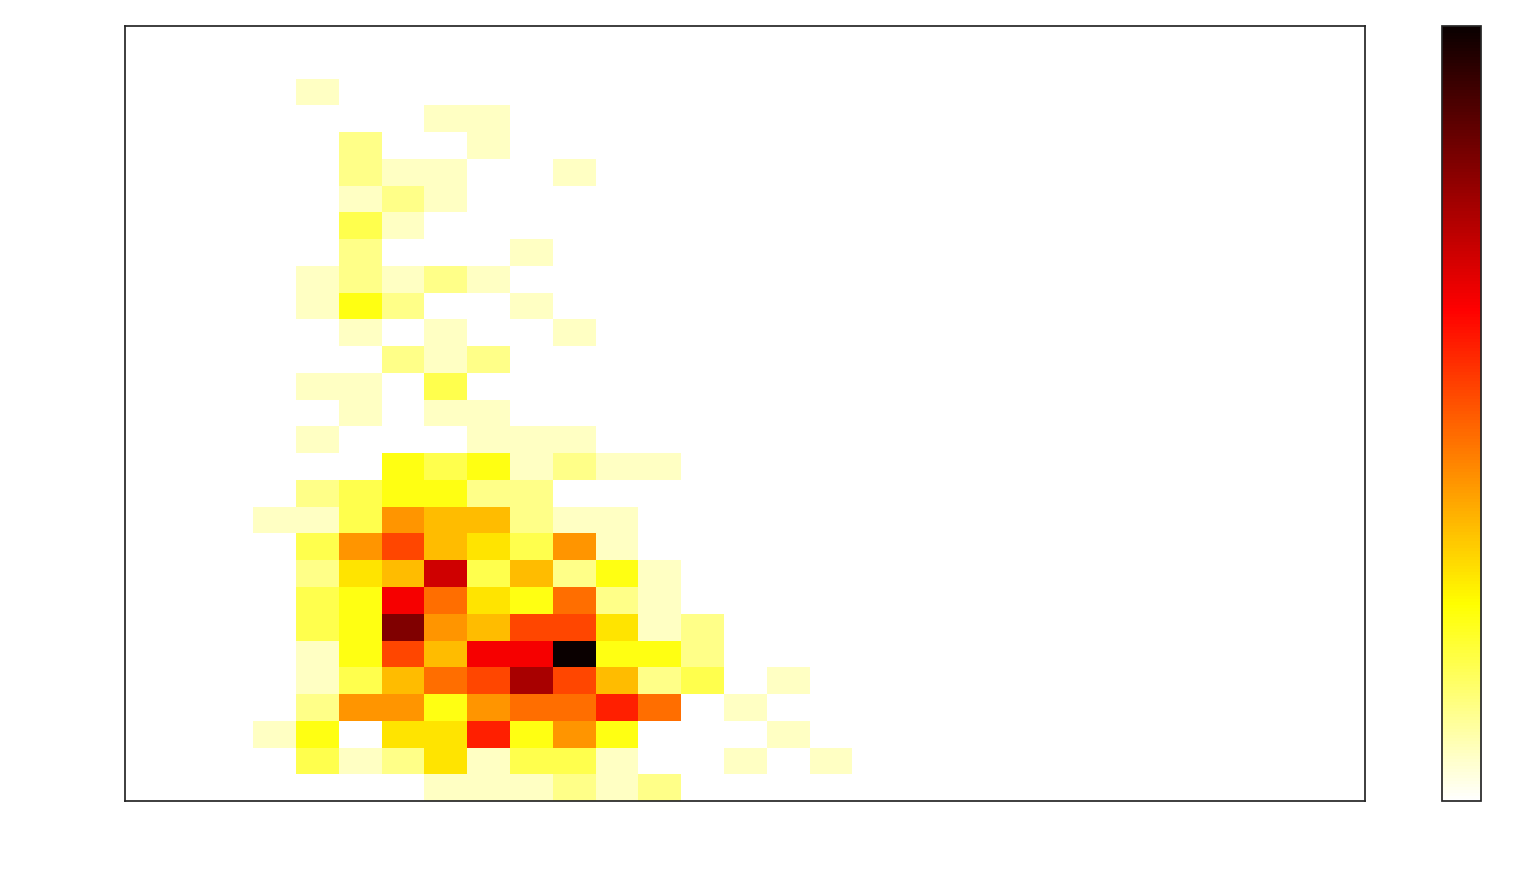

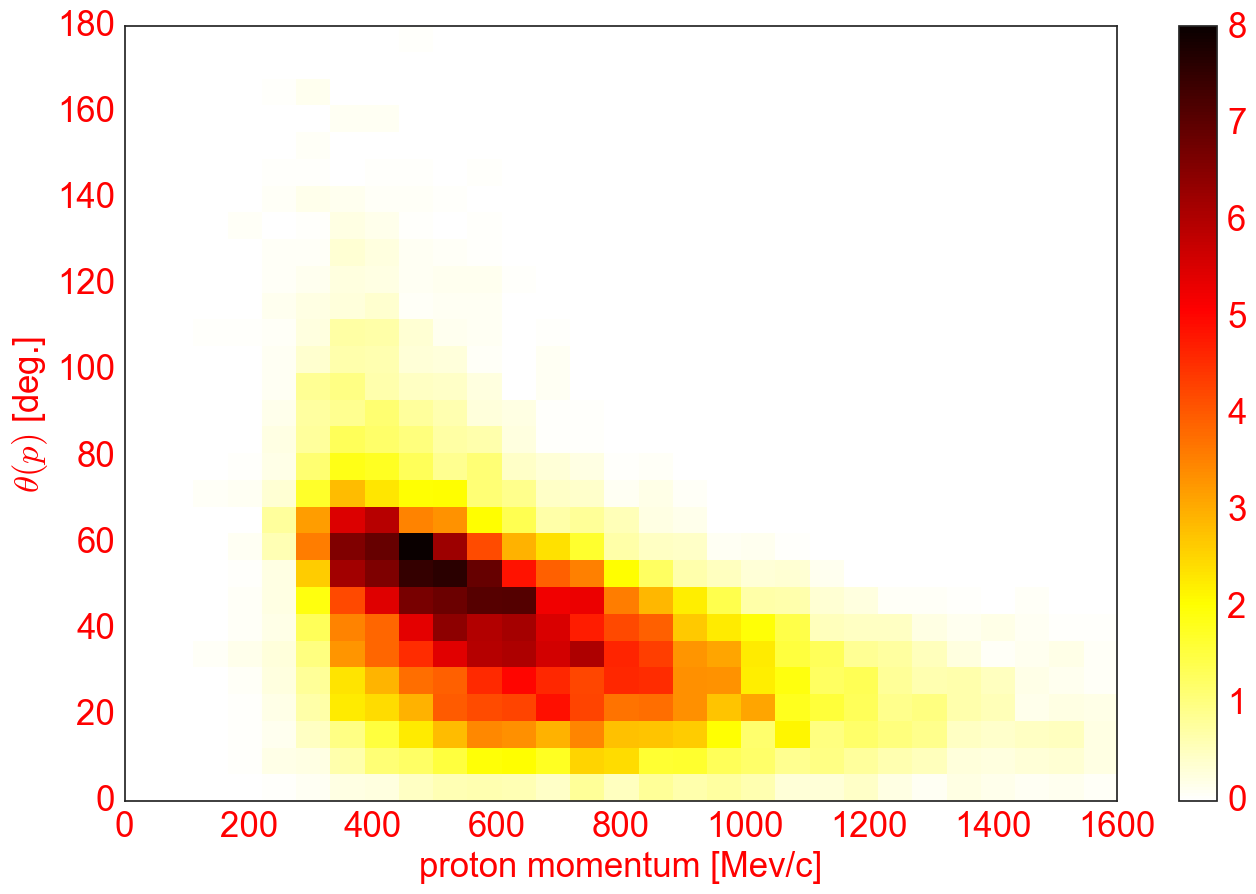

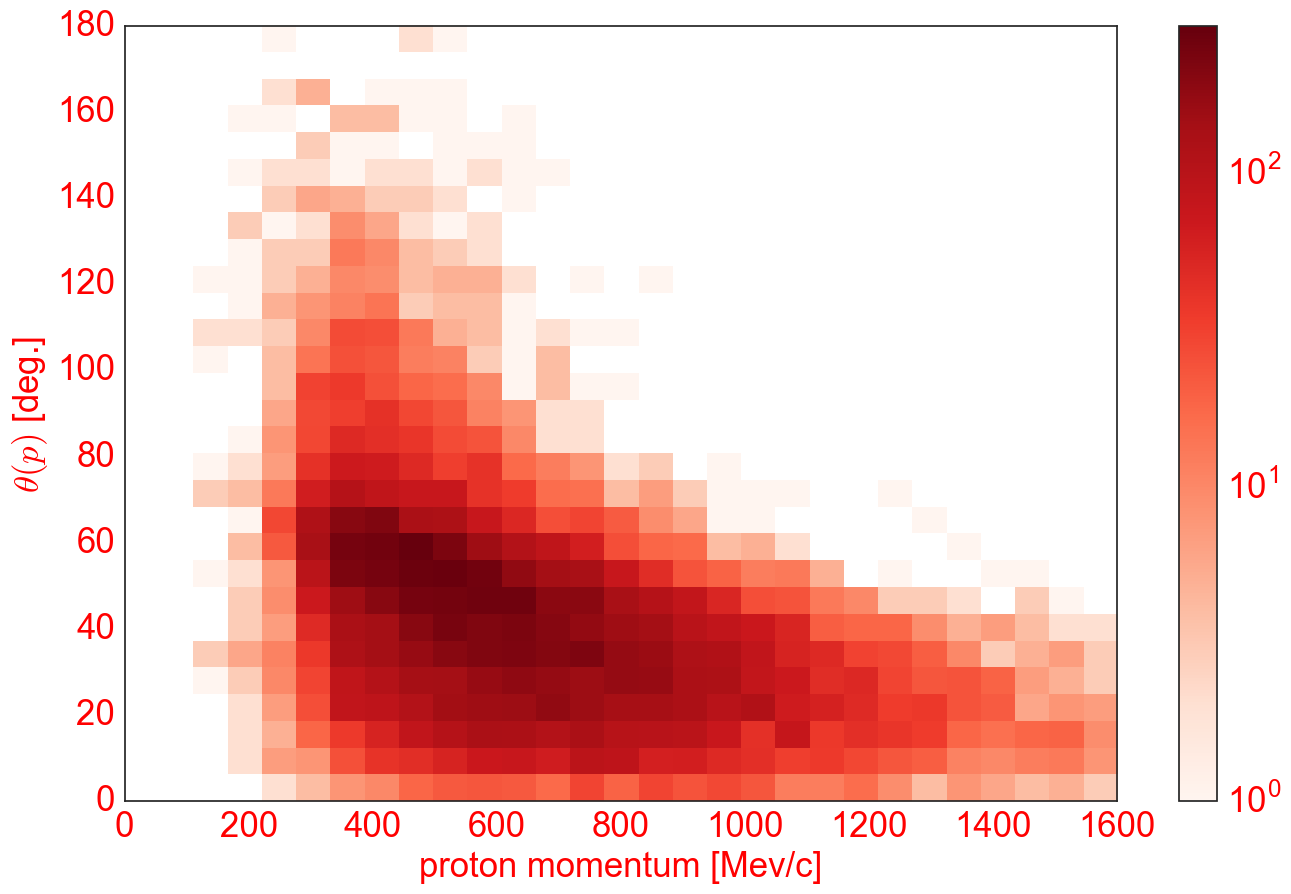

In [7]:
bins = (np.linspace(0,1600,30),np.linspace(0,180,30))

plot_2d_hist( data.p_P , (180./np.pi)*data.p_theta , bins=bins , cmap='hot_r',
             xlabel='proton momentum [Mev/c]' , ylabel='$\\theta(p)$ [deg.]' , 
             figsize=(20,10) , fontsize=25 , weights=None , ticks_color='white', norm='non');
cb = plt.colorbar()
cb.ax.tick_params(labelsize=25,labelcolor='white')

weights = (float(len(data))/len(MCBNB_rec_CCQE_protons))*(MCBNB_rec_CCQE_protons.truth_P/MCBNB_rec_CCQE_protons.truth_P)
plot_2d_hist( 1000*MCBNB_rec_CCQE_protons.truth_P , (180./np.pi)*MCBNB_rec_CCQE_protons.truth_theta , 
             bins=bins , cmap='hot_r',
             weights=weights,
             xlabel='proton momentum [Mev/c]' , ylabel='$\\theta(p)$ [deg.]' , 
             figsize=(16,10) , fontsize=25 , ticks_color='red', norm='non');
cb = plt.colorbar()
cb.ax.tick_params(labelsize=25,labelcolor='red')




plot_2d_hist( 1000*MCBNB_rec_CCQE_protons.truth_P , (180./np.pi)*MCBNB_rec_CCQE_protons.truth_theta , 
             bins=bins , cmap='Reds',
             xlabel='proton momentum [Mev/c]' , ylabel='$\\theta(p)$ [deg.]' , 
             figsize=(16,10) , fontsize=25 , weights=None , ticks_color='red');
cb = plt.colorbar()
cb.ax.tick_params(labelsize=25,labelcolor='red')



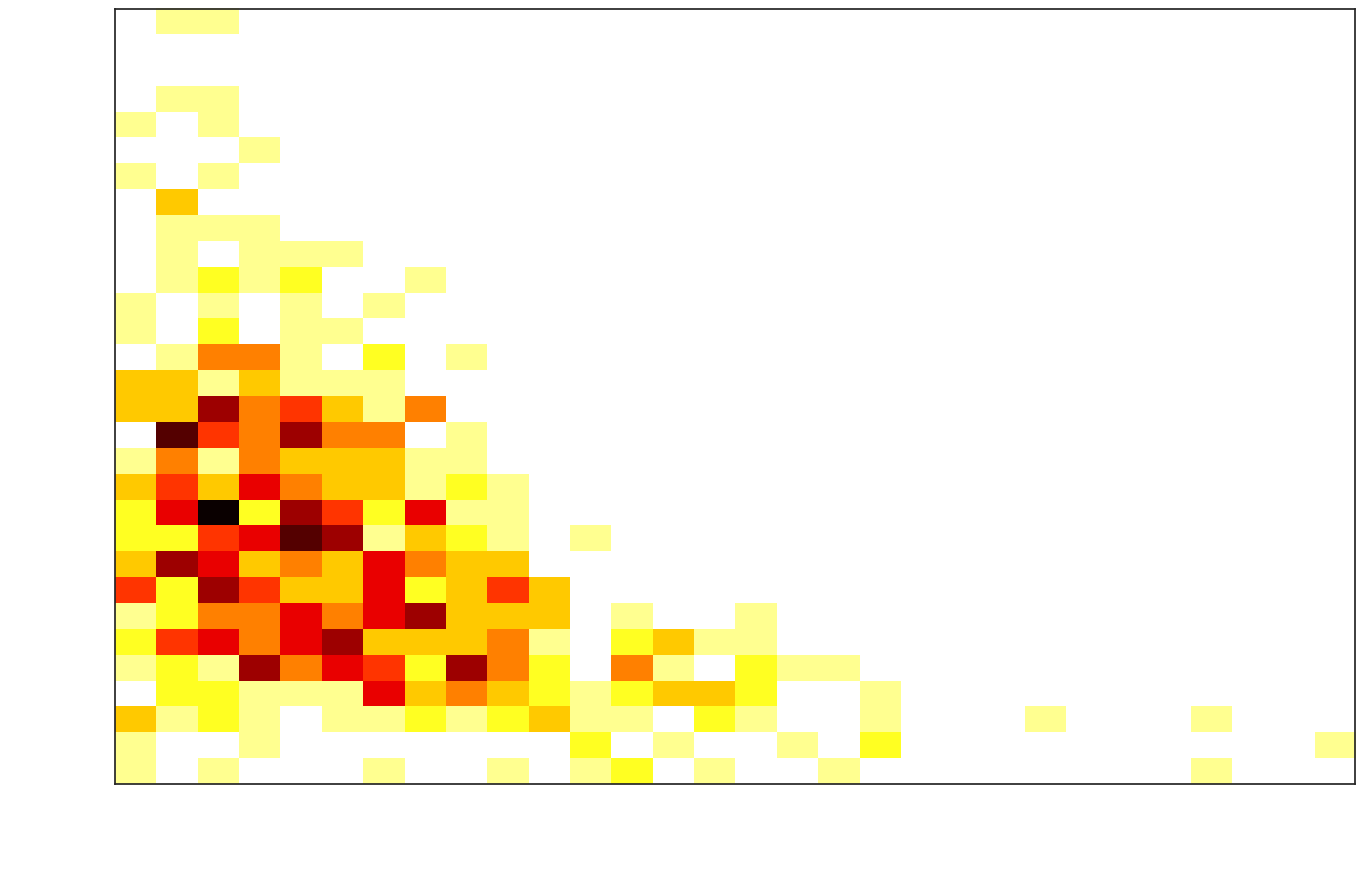

In [5]:
plot_2d_hist( data.mu_P , data.mu_theta , bins=30 , cmap='hot_r',
             xlabel='muon momentum [Mev/c]' , ylabel='$\\theta(\\mu)$ [deg.]' , 
             figsize=(16,10) , fontsize=25 , weights=None, ticks_color='white');

In [ ]:
plot_2d_hist( data.mu_phi , data.p_phi , bins=30 , cmap='hot_r',
             xlabel='$\\phi(\\mu)$ [rad.]' , ylabel='$\\theta(\\mu)$ [deg.]' , 
             figsize=(16,10) , fontsize=25 , weights=None, ticks_color='white');

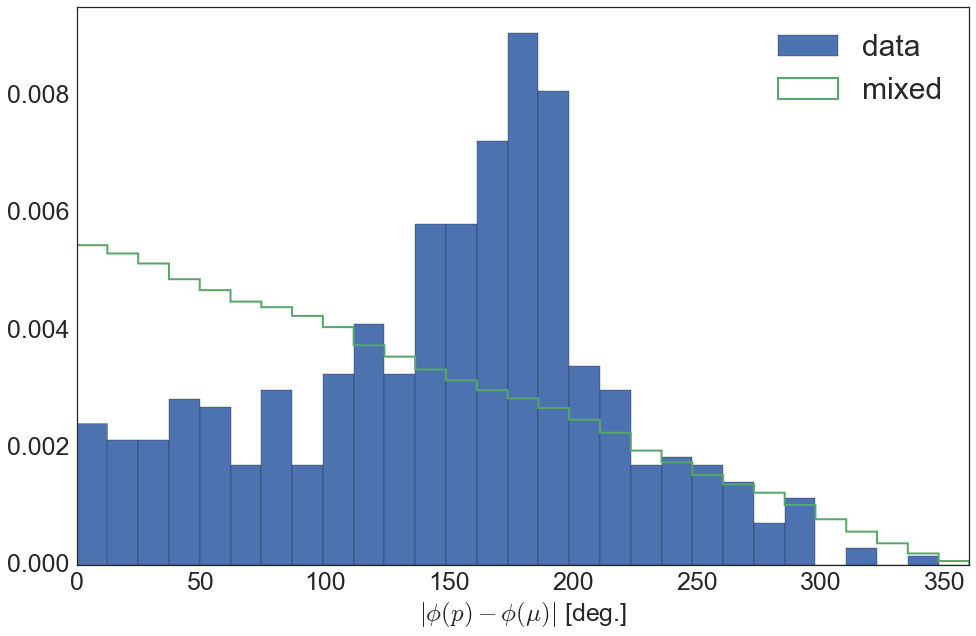

In [17]:
ax , h , bins , patches = plot_1d_hist( 180/3.14*np.abs(data.mu_phi - data.p_phi) ,                                         
                                       bins=np.linspace(0,360,30) ,                                                                              
                                       xlabel='$|\\phi(p)-\\phi(\\mu)|$ [deg.]' ,                                       
                                       label = 'data',
                                       figsize=(16,10),
                                       normed=1);
plt.hist(180/3.14*np.abs(mixed.mu_phi - mixed.p_phi),histtype='step',label='mixed',linewidth=2,normed=1,bins=np.linspace(0,360,30));

mid = 0.5*(bins[1:] + bins[:-1])
# ax.bar(mid, h, yerr=np.sqrt(h), linewidth=0,error_kw=dict(ecolor='black', lw=2, capsize=5, capthick=2))
# ax.set_ylim(0,1.02*np.max(h+np.sqrt(h)))
ax.set_xlim(0,360)
plt.legend(loc='upper right',fontsize=30)

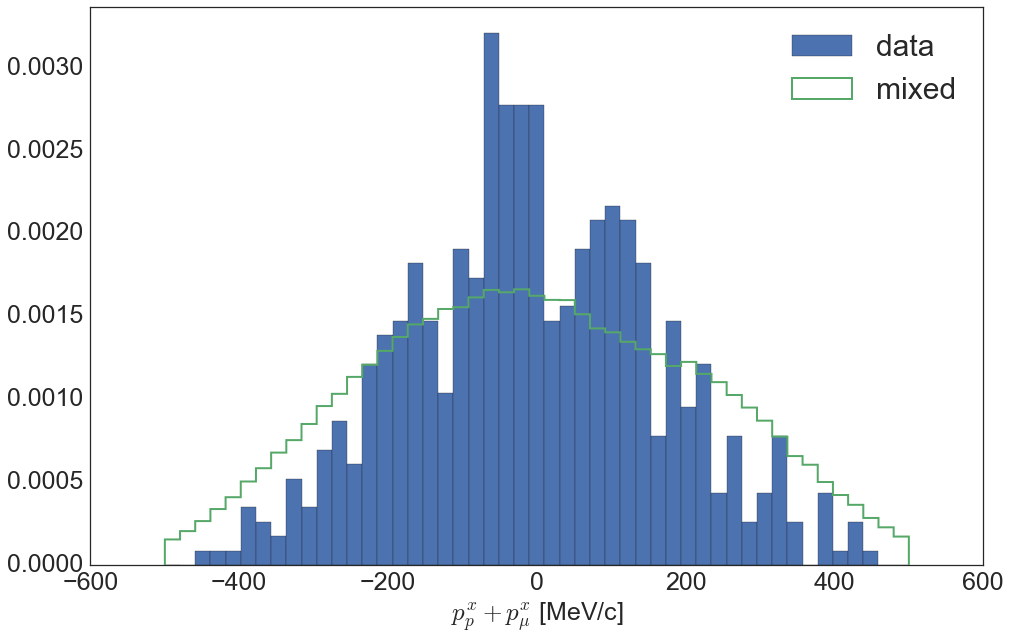

In [25]:
Px_mu_p = data.mu_P*np.sin(data.mu_theta)*np.cos(data.mu_phi)+data.p_P*np.sin(data.p_theta)*np.cos(data.p_phi)
mixed_Px_mu_p = mixed.mu_P*np.sin(mixed.mu_theta)*np.cos(mixed.mu_phi)+mixed.p_P*np.sin(mixed.p_theta)*np.cos(mixed.p_phi)

bins=np.linspace(-500,500,50)
ax , h , bins , patches = plot_1d_hist( Px_mu_p ,                                         
                                       bins=bins ,                                                                              
                                       xlabel='$p_p^x+p_{\\mu}^x$ [MeV/c]' ,                                       
                                       label = 'data',
                                       figsize=(16,10),
                                       normed=1);
plt.hist(mixed_Px_mu_p,histtype='step',label='mixed',linewidth=2,normed=1,bins=bins);
mid = 0.5*(bins[1:] + bins[:-1])
plt.legend(loc='upper right',fontsize=30)

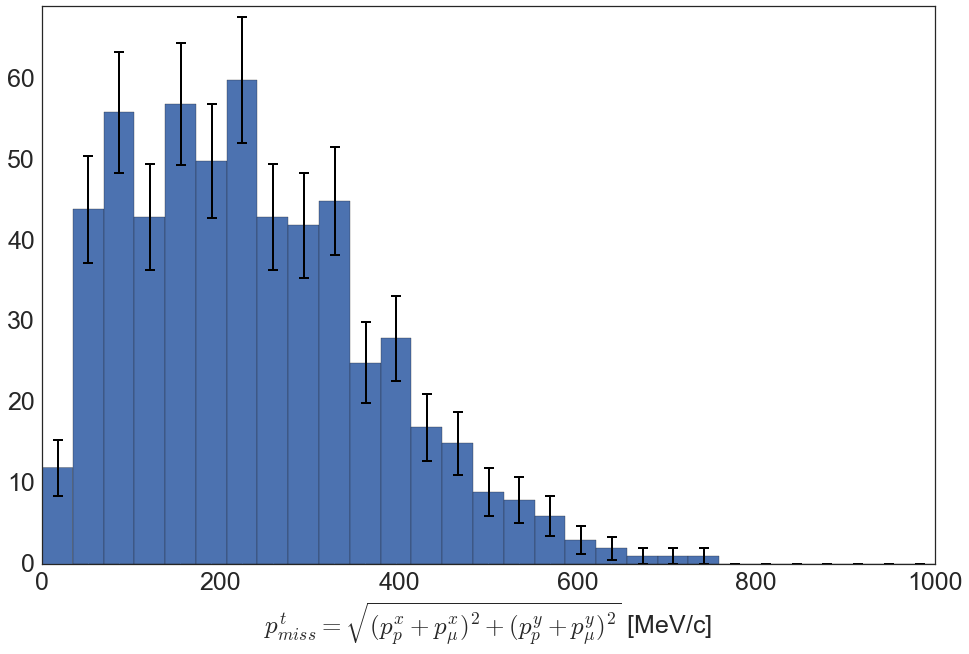

In [5]:
Px_mu_p = data.mu_P*np.sin(data.mu_theta)*np.cos(data.mu_phi)+data.p_P*np.sin(data.p_theta)*np.cos(data.p_phi)
Py_mu_p = data.mu_P*np.sin(data.mu_theta)*np.sin(data.mu_phi)+data.p_P*np.sin(data.p_theta)*np.sin(data.p_phi)
Pt_mu_p = np.sqrt( np.square(Px_mu_p) + np.square(Py_mu_p) )
# mixed_Py_mu_p = mixed.mu_P*np.sin(mixed.mu_theta)*np.sin(mixed.mu_phi)+mixed.p_P*np.sin(mixed.p_theta)*np.sin(mixed.p_phi)

bins=np.linspace(0,1000,30)
ax , h , bins , mid = hist_with_errors( Pt_mu_p , bins=np.linspace(0,1000,30) ,
                                       xlabel='$p_{miss}^t = \\sqrt{(p_p^x+p_{\\mu}^x)^2 + (p_p^y+p_{\\mu}^y)^2}$ [MeV/c]' )


# plt.hist(mixed_Py_mu_p,histtype='step',label='mixed',linewidth=2,normed=1,bins=bins);
# mid = 0.5*(bins[1:] + bins[:-1])
# plt.legend(loc='upper right',fontsize=30)

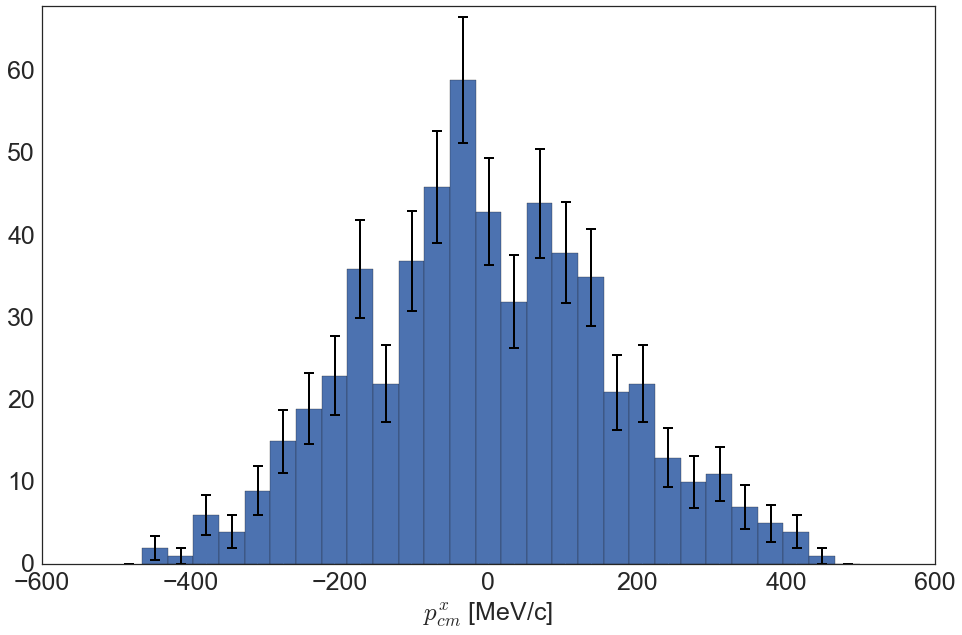

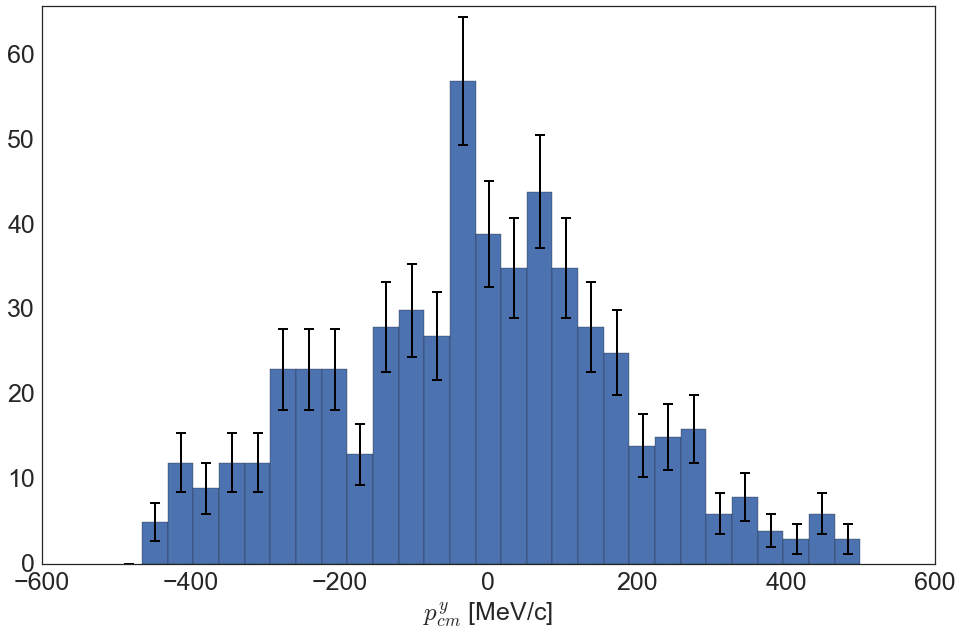

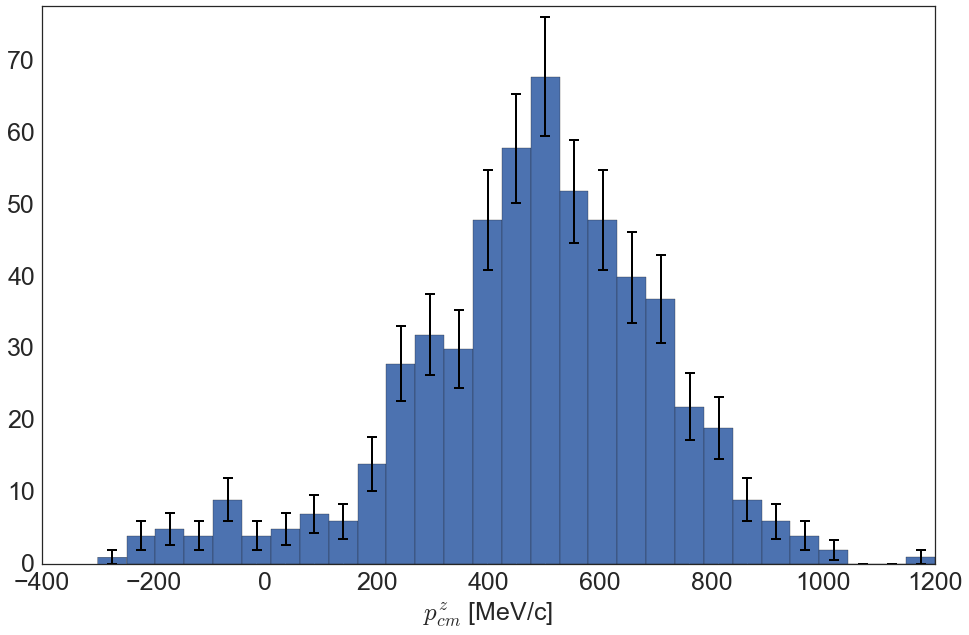

In [6]:
bins = np.linspace(-500,500,30)
xlabel='$p_{cm}^x$ [MeV/c]'
ax , h , bins , mid = hist_with_errors( data.mu_Px+data.p_Px , bins=bins , xlabel=xlabel )

xlabel='$p_{cm}^y$ [MeV/c]'
ax , h , bins , mid = hist_with_errors( data.mu_Py+data.p_Py , bins=bins , xlabel=xlabel )

bins = np.linspace(-300,1200,30)
xlabel='$p_{cm}^z$ [MeV/c]'
ax , h , bins , mid = hist_with_errors( data.mu_Pz+data.p_Pz , bins=bins , xlabel=xlabel )




In [ ]:
Py_mu_p = data.mu_P*np.sin(data.mu_theta)*np.sin(data.mu_phi)+data.p_P*np.sin(data.p_theta)*np.sin(data.p_phi)
mixed_Py_mu_p = mixed.mu_P*np.sin(mixed.mu_theta)*np.sin(mixed.mu_phi)+mixed.p_P*np.sin(mixed.p_theta)*np.sin(mixed.p_phi)

bins=np.linspace(-500,500,50)
ax , h , bins , patches = plot_1d_hist( Py_mu_p ,                                         
                                       bins=bins ,                                                                              
                                       xlabel='$p_p^y+p_{\\mu}^y$ [MeV/c]' ,                                       
                                       label = 'data',
                                       figsize=(16,10),
                                       normed=1);
plt.hist(mixed_Py_mu_p,histtype='step',label='mixed',linewidth=2,normed=1,bins=bins);
mid = 0.5*(bins[1:] + bins[:-1])
plt.legend(loc='upper right',fontsize=30)

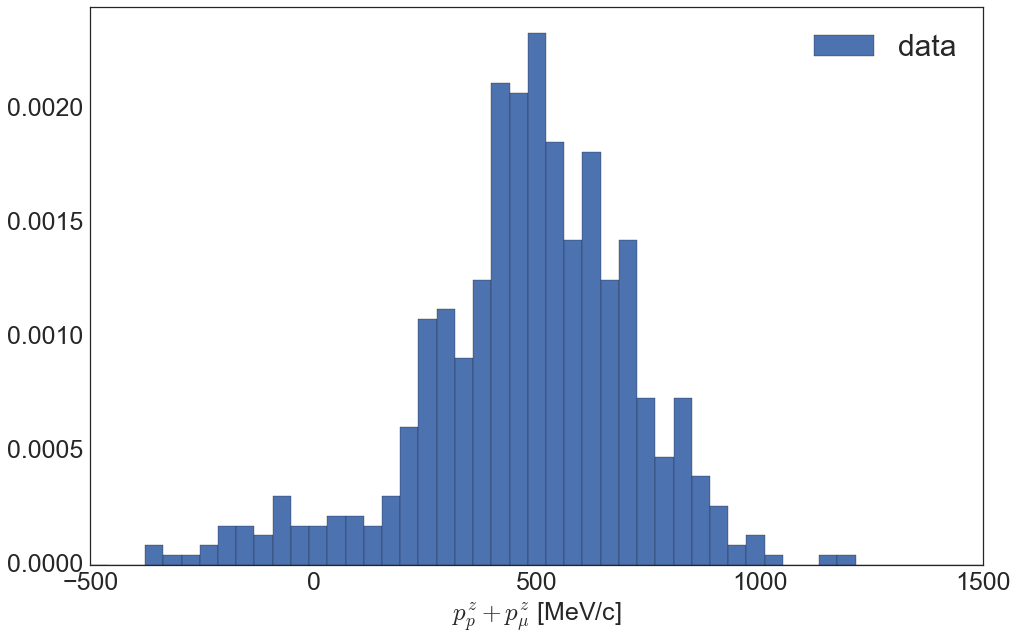

In [4]:
Pz_mu_p = data.mu_P*np.cos(data.mu_theta)+data.p_P*np.cos(data.p_theta)
mixed_Pz_mu_p = mixed.mu_P*np.cos(mixed.mu_theta)+mixed.p_P*np.cos(mixed.p_theta)

bins=np.linspace(-500,1500,50)
ax , h , bins , patches = plot_1d_hist( Pz_mu_p ,                                         
                                       bins=bins ,                                                                              
                                       xlabel='$p_p^z+p_{\\mu}^z$ [MeV/c]' ,                                       
                                       label = 'data',
                                       figsize=(16,10),
                                       normed=1);
# plt.hist(mixed_Pz_mu_p,histtype='step',label='mixed',linewidth=2,normed=1,bins=bins);
mid = 0.5*(bins[1:] + bins[:-1])
plt.legend(loc='upper right',fontsize=30)